#                        HOUSE PRICE PREDICTION - REGRESSION

## Import packages

In [1]:
import numpy as np# scientific computing.
import pandas as pd #easy manipulation of data structures.
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # data visualization
# for plotting the chart in same notebook
%matplotlib inline 
import warnings
warnings.filterwarnings("ignore") # ignore the warning
data=pd.read_csv("output.csv") # loading housing datasets
data.head()# showing top 5 records in the dataset


,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


## Data Exploaration and Feature Engineering

In [2]:
# finding shape of the dataset
shape=data.shape
print("shape of the dataset is :",shape)

shape of the dataset is : (4600, 18)


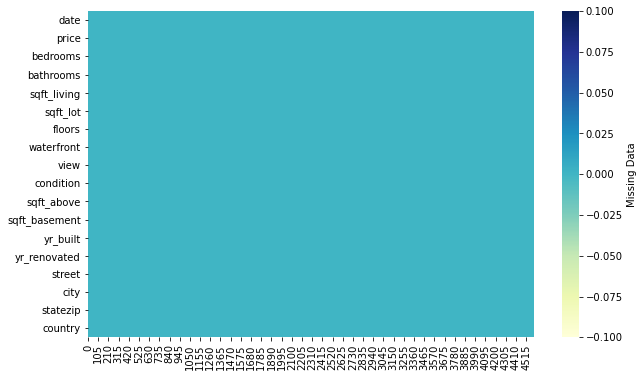

In [3]:
#exploaring missing value using heatmap
#this chart showing missing value in different colour.
plt.figure(figsize=(10,6))
sns.heatmap(data.isna().transpose(),
            cmap="YlGnBu",
            cbar_kws={'label': 'Missing Data'})
plt.savefig("visualizing_missing_data_with_heatmap_Seaborn_Python.png", dpi=150)

In [4]:
# checking missing values
data.isnull().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

In [5]:
# information of columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [6]:
# getting unique values in each columns
data.nunique()

date               70
price            1741
bedrooms           10
bathrooms          26
sqft_living       566
sqft_lot         3113
floors              6
waterfront          2
view                5
condition           5
sqft_above        511
sqft_basement     207
yr_built          115
yr_renovated       60
street           4525
city               44
statezip           77
country             1
dtype: int64

In [7]:
# getting unique records in country columns
data["country"].unique()

array(['USA'], dtype=object)

country feature has a single value i.e., USA, so,this column  is not useful to fit the model.so, it is better to remove this column before fitting the model

In [8]:
# getting statistics of numeric columns
data.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.103478,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261
std,5.638347e+05,0.908848,0.783781,963.159990,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


In [9]:
# import datetime libraries 
# here i seperate the date column into month, day, year
import datetime as dt # datetime packages

data["date"]= pd.to_datetime(data["date"])

data["day"] = data["date"].dt.day # seperate column for date
data["month"] = data["date"].dt.month# seperate column for month
data["year"] = data["date"].dt.year# seperate column for year

data = data.drop(columns=["date"]) # droping the existing column

data.head()# print top 5 entities

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country,day,month,year
0,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA,2,5,2014
1,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA,2,5,2014
2,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA,2,5,2014
3,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA,2,5,2014
4,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA,2,5,2014


In [10]:
data["year"].unique()# unique values in year

array([2014], dtype=int64)

In [11]:
data["month"].unique()# unique values in month

array([5, 6, 7], dtype=int64)

year column has one entities i.e., 2014 and month column has three entities 5,6,7. so , these columns are not useful to fit the model.

In [12]:
# exploring the unique value in bedroom, bathroom, floors
bedroom=data["bedrooms"].unique()
print("types of bedrooms:",bedroom)

bathrooms=data["bathrooms"].unique()
print("types of bathrooms:",bathrooms)

floors=data["floors"].unique()
print("types of floors:",floors)


types of bedrooms: [3. 5. 4. 2. 6. 7. 9. 1. 8. 0.]
types of bathrooms: [1.5  2.5  2.   2.25 1.   1.75 2.75 3.   3.25 3.5  8.   4.25 4.   3.75
 5.   4.5  5.75 1.25 6.5  4.75 0.75 5.25 5.5  6.25 0.   6.75]
types of floors: [1.5 2.  1.  2.5 3.  3.5]


we can see the bedroom, bathroom and floors are in float, it is supposed to be in integer, so let's change these columns datatype into integer

In [13]:
# changing datatype
data["price"]= data["price"].astype("int64") # changing datatype into int64
data["bedrooms"]= data["bedrooms"].astype("int64")# changing datatype into int64
data["bathrooms"]= data["bathrooms"].astype("int64")# changing datatype into int64
data["floors"]= data["floors"].astype("int64")# changing datatype into int64

In [14]:
# now check the information of columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   price          4600 non-null   int64 
 1   bedrooms       4600 non-null   int64 
 2   bathrooms      4600 non-null   int64 
 3   sqft_living    4600 non-null   int64 
 4   sqft_lot       4600 non-null   int64 
 5   floors         4600 non-null   int64 
 6   waterfront     4600 non-null   int64 
 7   view           4600 non-null   int64 
 8   condition      4600 non-null   int64 
 9   sqft_above     4600 non-null   int64 
 10  sqft_basement  4600 non-null   int64 
 11  yr_built       4600 non-null   int64 
 12  yr_renovated   4600 non-null   int64 
 13  street         4600 non-null   object
 14  city           4600 non-null   object
 15  statezip       4600 non-null   object
 16  country        4600 non-null   object
 17  day            4600 non-null   int64 
 18  month          4600 non-null

In [15]:
# exploaring price feature i.e., Target variables
data["price"].describe()

count    4.600000e+03
mean     5.519630e+05
std      5.638347e+05
min      0.000000e+00
25%      3.228750e+05
50%      4.609430e+05
75%      6.549625e+05
max      2.659000e+07
Name: price, dtype: float64

we can see the maximum price range is 26590000 and minimum price range is 0 with mean of 551962, so this is obvious having duplicate values, lets remove the outliers.

# Removing outliers

In [16]:
# removing outliers using inter quartile range
# this mmethods can remove the records are located far away from mean values.
def remove_duplicate(data, x):
    q25 = np.percentile(data[x], 25) # assigning below 25% of value
    q75 = np.percentile(data[x], 75)  # assigning above 75% of value
    iqr = q75 - q25
    cut_off = iqr * 1.5
    lower, upper = 1, (q75 + cut_off)
    data = data[(data[x] < upper) & (data[x] > lower)]
    print(f"Outliers in the {x} are sucessfully removed\n")
    return data
data = remove_duplicate(data, 'price')
# the distribution of records more than 75 percent and less than 25 percent are removed

Outliers in the price are sucessfully removed



<AxesSubplot:xlabel='price', ylabel='Count'>

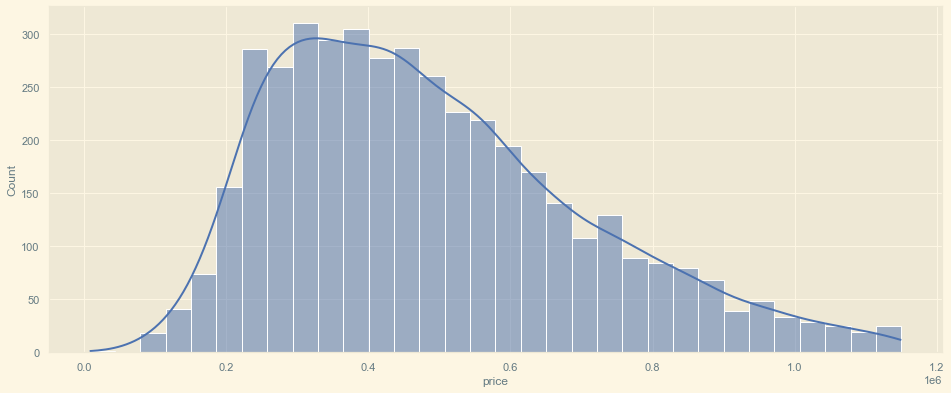

In [17]:
# visualizing price in  histogram to check wheather our price value are normal distribution or not.
from scipy import stats #
from matplotlib import style # giving more style to our visualization
from matplotlib.gridspec import GridSpec
sns.set()
style.use('Solarize_Light2')
pd.options.mode.chained_assignment = None 
fig = plt.figure(figsize=(16, 14))
grid = GridSpec(ncols=1, nrows=2, figure=fig)

# Histogram
ax1 = fig.add_subplot(grid[0, :])
sns.histplot(data['price'], ax=ax1, kde=True)

In [18]:
# value count in bedroom columns
data['bedrooms'].value_counts()


3    1981
4    1394
2     557
5     282
6      47
1      37
7      10
0       1
8       1
9       1
Name: bedrooms, dtype: int64

<AxesSubplot:xlabel='bedrooms', ylabel='count'>

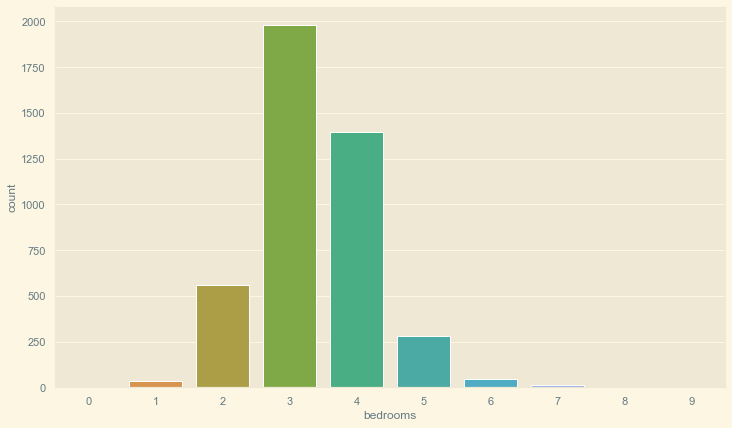

In [19]:
# visualizing bedroom columns
fig = plt.figure(figsize=(12, 7))
sns.countplot(data.bedrooms)

In [20]:
# value count in bathroom columns
data['bathrooms'].value_counts()

2    2217
1    1641
3     390
4      39
0      18
5       6
Name: bathrooms, dtype: int64

<AxesSubplot:xlabel='bathrooms', ylabel='count'>

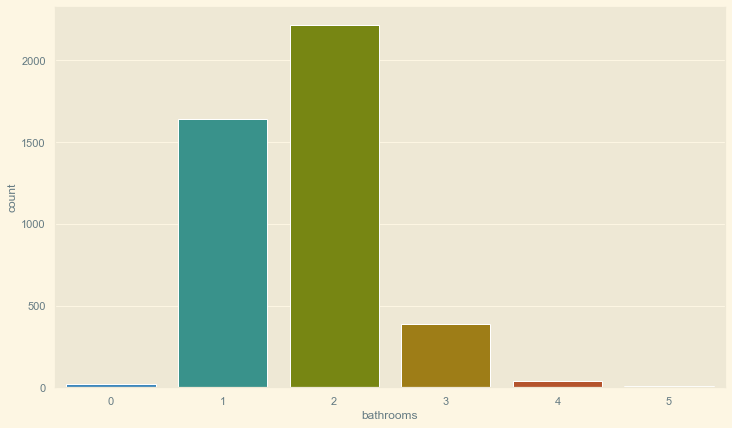

In [21]:
# visualizing bathroom columns
fig = plt.figure(figsize=(12, 7))
sns.countplot(data.bathrooms)

In [22]:
# creat new dataframe for removing duplicate value in bathrooms, in the dataframe bathroom less than 1 are removed
df = data[(data.bathrooms>= 1)]


In [23]:
# value count in bathroom columns
df['bathrooms'].value_counts()

2    2217
1    1641
3     390
4      39
5       6
Name: bathrooms, dtype: int64

we can see there is no bathroom less than 1 i.e., zero bathroom

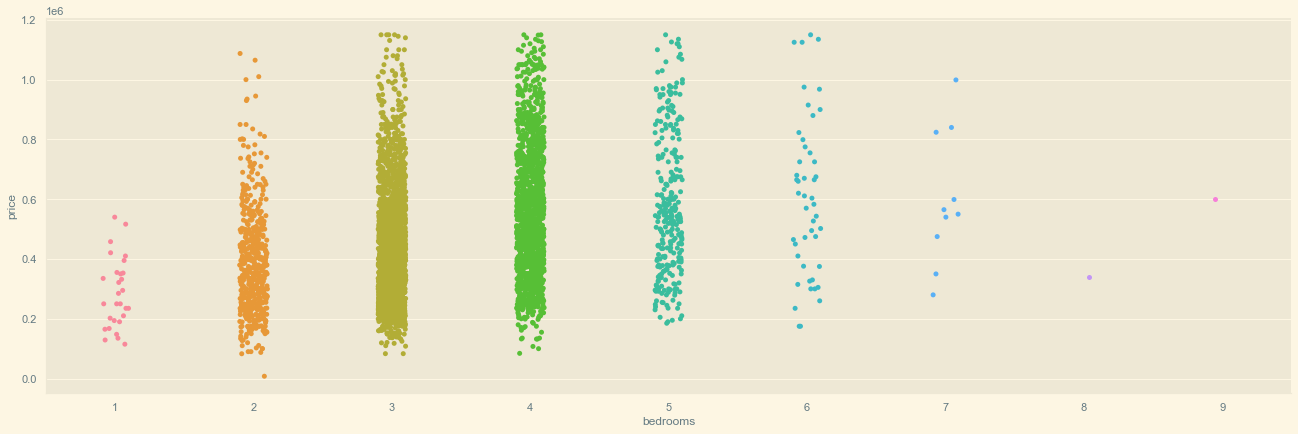

In [24]:
# lets check the relationship between bathrooms and price
sns.catplot(x='bedrooms', y='price', data=df, height=6, aspect=3)

we can see the bedrooms 3,4,5 have a higher price than other

<AxesSubplot:xlabel='floors', ylabel='count'>

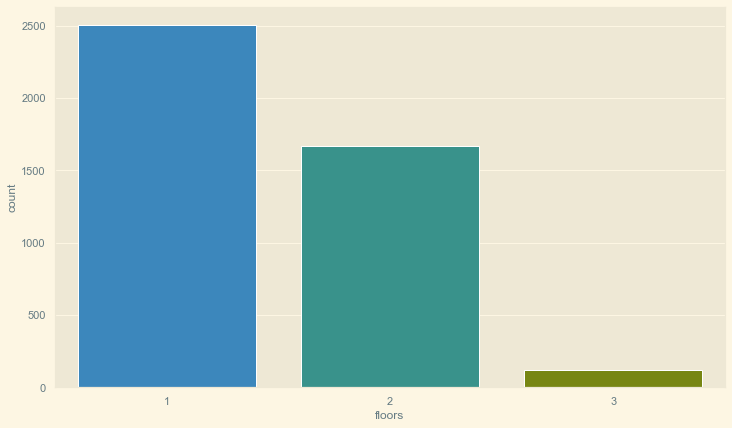

In [25]:
# visualizing floors columns
fig = plt.figure(figsize=(12, 7))
sns.countplot(df.floors)

In [26]:
# value count in waterfront columns
print(df.waterfront.value_counts())


0    4278
1      15
Name: waterfront, dtype: int64


<AxesSubplot:xlabel='view', ylabel='count'>

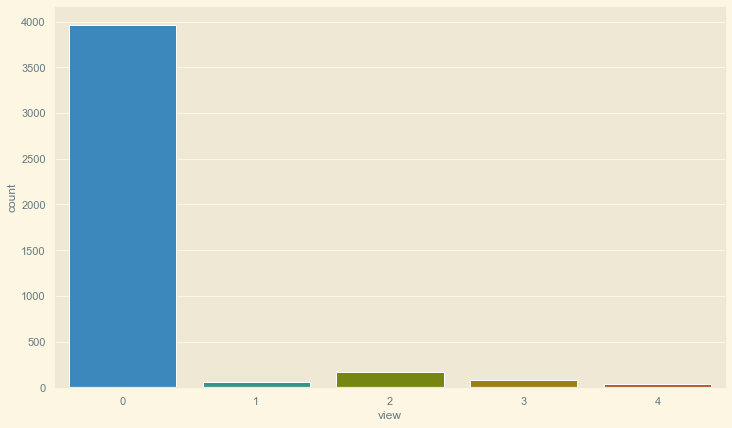

In [27]:

# visualizing views columns
fig = plt.figure(figsize=(12, 7))
sns.countplot(df.view)

<AxesSubplot:xlabel='condition', ylabel='count'>

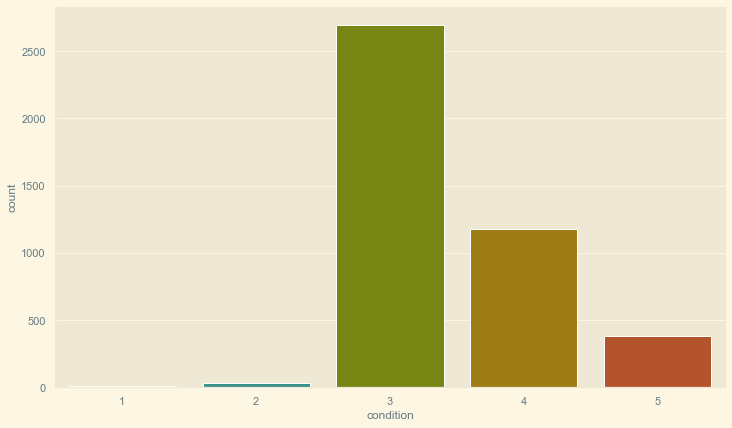

In [28]:
# visualizing views columns
fig = plt.figure(figsize=(12, 7))
sns.countplot(df.condition)

<AxesSubplot:xlabel='condition', ylabel='price'>

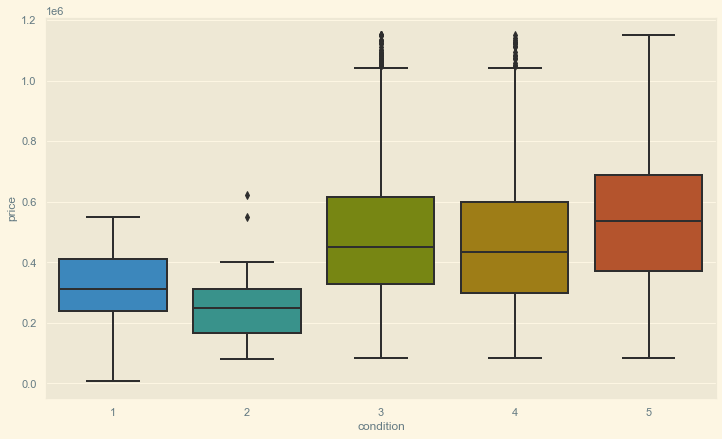

In [29]:
fig = plt.figure(figsize=(12, 7))
sns.boxplot(x='condition', y='price', data=data)

In [30]:
# exploring unique value in year build
df["yr_built"].unique()

array([1955, 1966, 1963, 1976, 1938, 1989, 1985, 1945, 1948, 1980, 1965,
       1956, 1997, 1987, 1983, 1923, 1954, 2005, 1991, 1959, 1920, 1979,
       1951, 1967, 2004, 2014, 1995, 1944, 1992, 1957, 1978, 1974, 1950,
       1990, 1949, 1968, 1977, 1996, 2001, 2000, 1929, 2006, 2008, 2009,
       2012, 2013, 2007, 1986, 1973, 1988, 1900, 1928, 1982, 1960, 2003,
       1998, 1942, 1908, 1958, 1939, 1909, 1975, 1961, 1971, 1924, 1902,
       1962, 1953, 1994, 1930, 1984, 2010, 1912, 1947, 1916, 1940, 1970,
       1952, 1999, 1964, 1926, 1905, 1903, 1943, 1993, 1946, 1904, 1981,
       1906, 1921, 1922, 2011, 2002, 1917, 1913, 1910, 1969, 1925, 1918,
       1972, 1941, 1919, 1936, 1911, 1927, 1937, 1932, 1931, 1901, 1907,
       1915, 1935, 1933, 1914, 1934], dtype=int64)

In [31]:
#minimum build year
df["yr_built"].min()

1900

In [32]:
#maximum build year
df["yr_built"].max()

2014

In [33]:
# exploaring year renovated
df["yr_renovated"].unique()

array([2005,    0, 1992, 1994, 2010, 2009, 2000, 1979, 1989, 2014, 1999,
       2003, 1983, 1997, 1912, 1923, 1954, 2011, 2001, 2013, 2006, 1972,
       1985, 1998, 2004, 1958, 2008, 1970, 1982, 1988, 1986, 1996, 2002,
       1971, 1990, 1956, 1984, 2012, 1993, 1969, 2007, 1981, 1974, 1963,
       1968, 1934, 1953, 1966, 1955, 1987, 1945, 1960, 1978, 1980, 1948,
       1995, 1913, 1977], dtype=int64)

zero in yr_renovated means that house was not renovated and non zero value denotes the year of renovated, here, i am coverting those value into 0 and 1, 0 is not renovated and 1 is renovated

In [34]:
# lambda function for converting yr renovated into two categories
df.yr_renovated = df.yr_renovated.apply(lambda x: 0 if x==0 else 1) # if it is zero,it return 0 elese return 1


In [35]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country,day,month,year
0,313000,3,1,1340,7912,1,0,0,3,1340,0,1955,1,18810 Densmore Ave N,Shoreline,WA 98133,USA,2,5,2014
2,342000,3,2,1930,11947,1,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA,2,5,2014
3,420000,3,2,2000,8030,1,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA,2,5,2014
4,550000,4,2,1940,10500,1,0,0,4,1140,800,1976,1,9105 170th Ave NE,Redmond,WA 98052,USA,2,5,2014
5,490000,2,1,880,6380,1,0,0,3,880,0,1938,1,522 NE 88th St,Seattle,WA 98115,USA,2,5,2014


In [36]:
# finding frequency in city column
city = df['city'].value_counts(ascending=False)
city

Seattle                1453
Renton                  291
Bellevue                232
Redmond                 227
Issaquah                183
Kent                    182
Kirkland                176
Auburn                  175
Sammamish               166
Federal Way             145
Shoreline               121
Woodinville             111
Maple Valley             95
Burien                   70
Snoqualmie               68
Kenmore                  65
Des Moines               58
North Bend               50
Mercer Island            50
Duvall                   42
Covington                41
Lake Forest Park         34
Bothell                  33
Newcastle                31
SeaTac                   28
Tukwila                  28
Vashon                   27
Enumclaw                 26
Carnation                19
Normandy Park            16
Fall City                 9
Black Diamond             8
Ravensdale                7
Pacific                   6
Algona                    5
Clyde Hill          

In [37]:
city.values.sum()# total values in city

4293

## Removing outliers with some Logic idea
 normally square ft per bedroom is 300 (i.e. 2 bhk apartment is minimum 600 sqft. If you have for example 800 sqft apartment with 3 bhk than that records is not reliable. i am removing such outliers by keeping our minimum thresold per bhk to be 300 sqft

In [38]:
df[df.sqft_lot/df.bedrooms<300].head() # getting values are less than 300

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country,day,month,year
598,450000,3,2,1250,892,2,0,0,3,1040,210,2010,0,2301 California Ave SW,Seattle,WA 98116,USA,13,5,2014
938,479000,3,2,1260,889,3,0,0,3,1260,0,2008,0,915 6th Ave N,Seattle,WA 98109,USA,20,5,2014
1203,320000,3,2,998,844,2,0,0,3,798,200,2007,0,820 NW 95th St,Seattle,WA 98117,USA,22,5,2014
1210,359000,3,1,1360,885,3,0,0,3,1360,0,2008,0,709 N 94th St,Seattle,WA 98103,USA,22,5,2014
1913,742000,3,3,1540,704,3,0,0,3,1540,0,2011,0,1820 E Howell St,Seattle,WA 98122,USA,4,6,2014


In [39]:
df.shape

(4293, 20)

In [40]:
df1 = df[~(df.sqft_lot/df.bedrooms<300)]# assigning the value less than 300
df1.shape

(4284, 20)

In [41]:
df1.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country,day,month,year
0,313000,3,1,1340,7912,1,0,0,3,1340,0,1955,1,18810 Densmore Ave N,Shoreline,WA 98133,USA,2,5,2014
2,342000,3,2,1930,11947,1,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA,2,5,2014
3,420000,3,2,2000,8030,1,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA,2,5,2014
4,550000,4,2,1940,10500,1,0,0,4,1140,800,1976,1,9105 170th Ave NE,Redmond,WA 98052,USA,2,5,2014
5,490000,2,1,880,6380,1,0,0,3,880,0,1938,1,522 NE 88th St,Seattle,WA 98115,USA,2,5,2014


## dimensionality reduction

In [42]:
##lets drop some unwanted features because this columns are not creat any impact while building the model
## it can reduce some computitational cost and give better accuracy
df2 = df1.drop(columns=["day","month","year","country","street","statezip"])

In [43]:
df2.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,city
0,313000,3,1,1340,7912,1,0,0,3,1340,0,1955,1,Shoreline
2,342000,3,2,1930,11947,1,0,0,4,1930,0,1966,0,Kent
3,420000,3,2,2000,8030,1,0,0,4,1000,1000,1963,0,Bellevue
4,550000,4,2,1940,10500,1,0,0,4,1140,800,1976,1,Redmond
5,490000,2,1,880,6380,1,0,0,3,880,0,1938,1,Seattle


## Label encoding for city

In [44]:
# Import label encoder 
from sklearn import preprocessing
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder()
# Encode labels in column 'Country'. 
df2['City']= label_encoder.fit_transform(df2['city']) 
print(df2['city'].head())

0    Shoreline
2         Kent
3     Bellevue
4      Redmond
5      Seattle
Name: city, dtype: object


In [45]:
df2.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,city,City
0,313000,3,1,1340,7912,1,0,0,3,1340,0,1955,1,Shoreline,36
2,342000,3,2,1930,11947,1,0,0,4,1930,0,1966,0,Kent,18
3,420000,3,2,2000,8030,1,0,0,4,1000,1000,1963,0,Bellevue,3
4,550000,4,2,1940,10500,1,0,0,4,1140,800,1976,1,Redmond,31
5,490000,2,1,880,6380,1,0,0,3,880,0,1938,1,Seattle,35


## splitting the data

In [46]:
# assigning the x and y value for fitting the model
X = df2.drop(['price','city'],axis='columns')# assigning for x
X.head(3)

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,City
0,3,1,1340,7912,1,0,0,3,1340,0,1955,1,36
2,3,2,1930,11947,1,0,0,4,1930,0,1966,0,18
3,3,2,2000,8030,1,0,0,4,1000,1000,1963,0,3


In [47]:
y = df2.price# assigning for y
y.head(3)

0    313000
2    342000
3    420000
Name: price, dtype: int64

In [48]:
X.columns

Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'sqft_above', 'sqft_basement',
       'yr_built', 'yr_renovated', 'City'],
      dtype='object')

In [49]:
# SPLITTING THE DATA FOR TRAIN AND TEST
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Feature selection

Feature selection is a crucial stage while fitting the model for getting good accuracy and it reduce computational cost as well.

<AxesSubplot:xlabel='sqft_basement', ylabel='Count'>

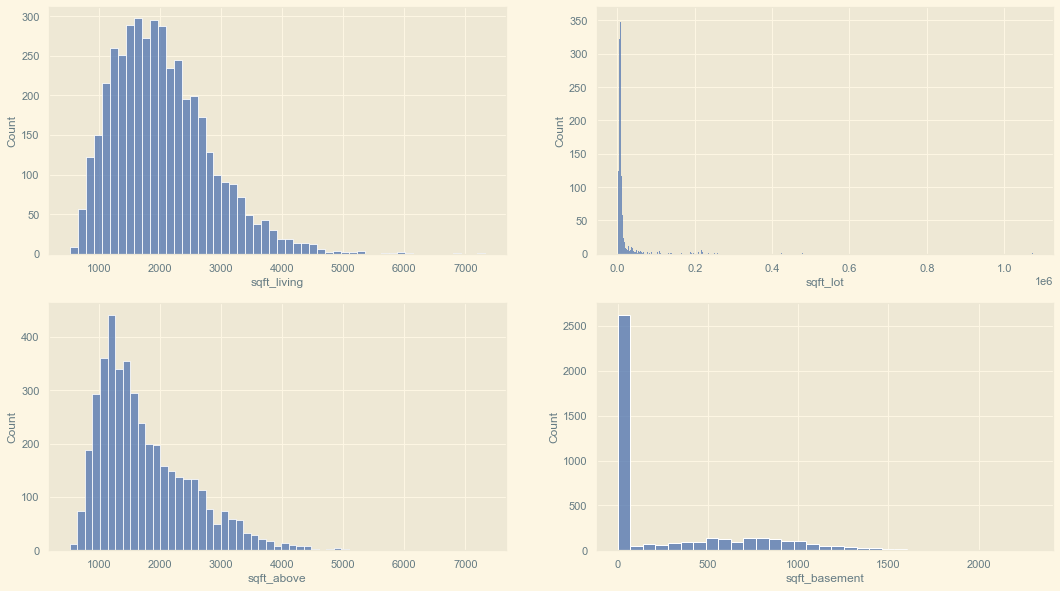

In [50]:
# finding better sqare ft value out of four using plot
fig, axes = plt.subplots(2, 2, figsize=(18, 10))
sns.histplot(ax=axes[0,0],x="sqft_living", data=df)
sns.histplot(ax=axes[0, 1],x="sqft_lot", data=df)
sns.histplot(ax=axes[1,0],x="sqft_above", data=df)
sns.histplot(ax=axes[1, 1],x="sqft_basement", data=df)

<Figure size 864x432 with 0 Axes>

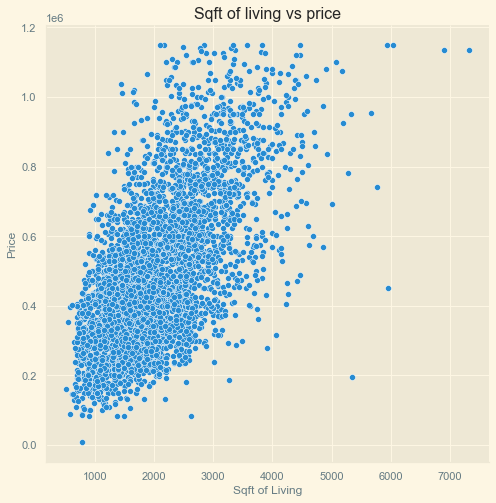

In [51]:
# Shows the distribution of sqft_living vs price
plt.figure(figsize = (12, 6))
sns.pairplot(df, x_vars = ['sqft_living'], y_vars = ['price'], size = 7, kind = 'scatter')
plt.xlabel('Sqft of Living')
plt.ylabel('Price')
plt.title('Sqft of living vs price')
plt.show()

<AxesSubplot:>

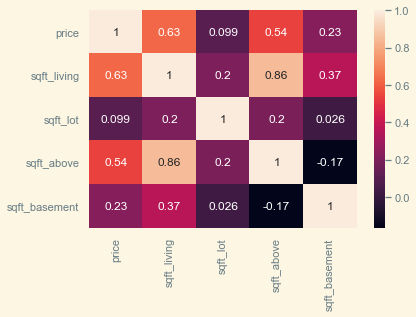

In [52]:
sns.heatmap(df[["price", "sqft_living", "sqft_lot", "sqft_above", "sqft_basement"]].corr(), annot=True)

In [53]:
# importing mutual information gain feature selection libraries for regression model
from sklearn.feature_selection import mutual_info_regression
# determine the mutual information
mutual_info = mutual_info_regression(X_train, y_train)
mutual_info

array([0.04471732, 0.10700494, 0.21938591, 0.01168576, 0.04067522,
       0.        , 0.02352206, 0.01815882, 0.15636016, 0.02675456,
       0.04916146, 0.01222545, 0.05057537])

In [54]:
mutual_information = pd.Series(mutual_info)
mutual_information.index = X_train.columns
mutual_information.sort_values(ascending=False)

sqft_living      0.219386
sqft_above       0.156360
bathrooms        0.107005
City             0.050575
yr_built         0.049161
bedrooms         0.044717
floors           0.040675
sqft_basement    0.026755
view             0.023522
condition        0.018159
yr_renovated     0.012225
sqft_lot         0.011686
waterfront       0.000000
dtype: float64

<AxesSubplot:>

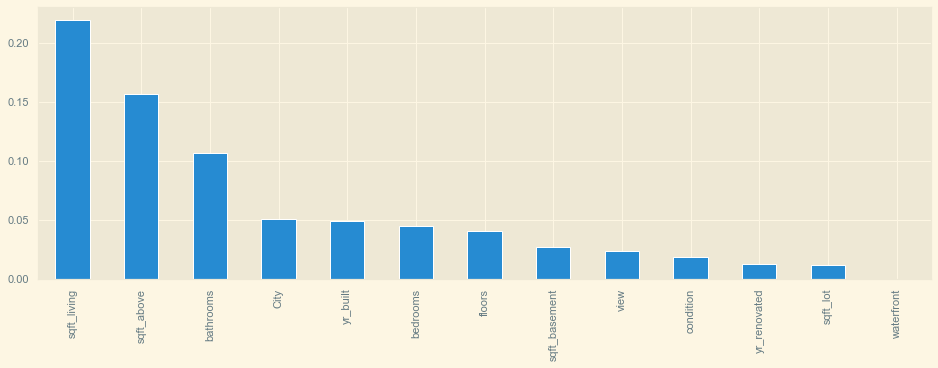

In [55]:
mutual_information.sort_values(ascending=False).plot.bar(figsize=(16,5))

In [56]:
from sklearn.feature_selection import SelectKBest
#No we Will select the  top 5 important features
top_seven = SelectKBest(mutual_info_regression, k=7)
top_seven.fit(X_train, y_train)
X_train.columns[top_seven.get_support()]

Index(['bedrooms', 'bathrooms', 'sqft_living', 'floors', 'sqft_above',
       'yr_built', 'City'],
      dtype='object')

In [57]:
# splitting the selected columns for fitting the model.
x= df2[['bedrooms', 'bathrooms', 'sqft_living', 'floors',
       'yr_built', 'City']] # assigning impartance features for x 
x.head(3)

,bedrooms,bathrooms,sqft_living,floors,yr_built,City
0,3,1,1340,1,1955,36
2,3,2,1930,1,1966,18
3,3,2,2000,1,1963,3


In [58]:
Y = df2.price
Y.head(3)

0    313000
2    342000
3    420000
Name: price, dtype: int64

In [59]:
# SPLITTING THE DATA FOR TRAIN AND TEST
from sklearn.model_selection import train_test_split
X_trains, X_tests, y_trains, y_tests = train_test_split(x, Y, test_size=0.3, random_state=42)

In [60]:
x.head()

,bedrooms,bathrooms,sqft_living,floors,yr_built,City
0,3,1,1340,1,1955,36
2,3,2,1930,1,1966,18
3,3,2,2000,1,1963,3
4,4,2,1940,1,1976,31
5,2,1,880,1,1938,35


In [61]:
Y.head()

0    313000
2    342000
3    420000
4    550000
5    490000
Name: price, dtype: int64

## Gradient Boosting - Regression 

In [62]:
#importing GradientBoosting regression model
from sklearn.ensemble import GradientBoostingRegressor
import sklearn.metrics as metrics# metrics for getting accuracy
from sklearn.metrics import r2_score, mean_absolute_error # r2 for performance and mse for getting error
from sklearn.metrics import mean_squared_error
from math import sqrt
gb = GradientBoostingRegressor() # assign the model in gb
gb.fit(X_trains,y_trains) # fitting the model without parameters
    

GradientBoostingRegressor()

In [63]:
print(f"Accuracy of training set:", gb.score(X_trains, y_trains))# accuracy of training
print(f"Accuracy of testing set: ", gb.score(X_tests, y_tests))# accuracy of testing

Accuracy of training set: 0.6944619036272448
Accuracy of testing set:  0.6514912602571087


In [64]:
 predict_gb =gb.predict(X_tests)

In [65]:
print("Metrics for Gradient Boosting:")
print (f'Mean Squared Error             : {metrics.mean_squared_error(y_tests, predict_gb)}\n'
  f'\nRoot Mean Squared Error        : '
  f'{np.sqrt(metrics.mean_squared_error(y_tests, predict_gb))}\n'
  f'\nMean Absolute Error            : {metrics.mean_absolute_error(y_tests, predict_gb)}\n'
          #f'Mean absolute percentage error: '
          #f'{metrics.mean_absolute_percentage_error(y_tests, predict_gb)}\n'
  f'\n'
  f'Train score  : {gb.score(X_trains, y_trains)}\n'
  f'Test score   : {gb.score(X_tests, y_tests)}\n')

Metrics for Gradient Boosting:
Mean Squared Error             : 15776096981.600958

Root Mean Squared Error        : 125602.93380968837

Mean Absolute Error            : 91484.23428134121

Train score  : 0.6944619036272448
Test score   : 0.6514912602571087



In [66]:
# checking the r square value
# sk learn has a inbuild package to find metrics
R_square = r2_score(predict_gb,y_tests) 
print('R sqare value:', R_square) 


R sqare value: 0.409808840946969


## Extreme Gradient Boosting - Regression

In [68]:
# import xgboost regression
from xgboost import XGBRegressor
xgb = XGBRegressor() # assigning 
xgb.fit(X_trains,y_trains) # fitting the model

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=4,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [69]:
print(f"Accuracy of training set:", xgb.score(X_trains, y_trains))# accuracy of training
print(f"Accuracy of testing set: ", xgb.score(X_tests, y_tests))# accuracy of testing

Accuracy of training set: 0.9285878230884484
Accuracy of testing set:  0.6447417815925016


In [70]:
 predict_xgb =xgb.predict(X_tests)

In [71]:
print("Metrics for xtra Gradient Boosting:")

print (f'Mean Squared Error             : {metrics.mean_squared_error(y_tests, predict_xgb)}\n'
  f'\nRoot Mean Squared Error        : '
  f'{np.sqrt(metrics.mean_squared_error(y_tests, predict_xgb))}\n'
  f'\nMean Absolute Error            : {metrics.mean_absolute_error(y_tests, predict_xgb)}\n'
          #f'Mean absolute percentage error: '
          #f'{metrics.mean_absolute_percentage_error(y_test, predict_xgb)}\n'
  f'\n'
  f'Train score  : {xgb.score(X_trains, y_trains)}\n'
  f'Test score   : {xgb.score(X_tests, y_tests)}\n')

Metrics for xtra Gradient Boosting:
Mean Squared Error             : 16081628573.338495

Root Mean Squared Error        : 126813.36117830209

Mean Absolute Error            : 89543.59681485711

Train score  : 0.9285878230884484
Test score   : 0.6447417815925016



In [72]:

R_square = r2_score(predict_xgb,y_tests) # r2
print('R sqare value:', R_square) 


R sqare value: 0.543502935169902


## Random Forest- Regression

In [74]:
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor()# assigning the model
forest.fit(X_trains,y_trains) # fitting the model

RandomForestRegressor()

In [75]:
print(f"Accuracy of training set:", forest.score(X_trains, y_trains))# accuracy of training data
print(f"Accuracy of testing set: ", forest.score(X_tests, y_tests))# accuracy of testing data

Accuracy of training set: 0.9427403016317463
Accuracy of testing set:  0.6426606890517912


In [76]:
predict_forest =forest.predict(X_tests)# assigning the predict_forest

In [77]:
print("Metrics for Random Forest:")

print (f'Mean Squared Error             : {metrics.mean_squared_error(y_tests, predict_forest)}\n'
  f'\nRoot Mean Squared Error        : '
  f'{np.sqrt(metrics.mean_squared_error(y_tests, predict_forest))}\n'
  f'\nMean Absolute Error            : {metrics.mean_absolute_error(y_tests, predict_forest)}\n'
          #f'Mean abs % error: '
          #f'{metrics.mean_absolute_percentage_error(y_test, predict)}\n'
  f'\n'
  f'Train score  : {forest.score(X_trains, y_trains)}\n'
  f'Test score   : {forest.score(X_tests, y_tests)}\n')

Metrics for Random Forest:
Mean Squared Error             : 16175834296.19685

Root Mean Squared Error        : 127184.25333427425

Mean Absolute Error            : 91567.44498683626

Train score  : 0.9427403016317463
Test score   : 0.6426606890517912



In [78]:
 
R_square = r2_score(predict_forest,y_tests) 
print('R sqare value:', R_square) 

R sqare value: 0.4935728018749289


## LightGBM regressor

In [80]:
from lightgbm import LGBMRegressor
lgbm = LGBMRegressor()# assigning the model
lgbm.fit(X_trains,y_trains)# fitting the model

LGBMRegressor()

In [81]:
print(f"Accuracy of training set:", lgbm.score(X_trains, y_trains))# accuracy of training data
print(f"Accuracy of testing set: ", lgbm.score(X_tests, y_tests))# accuracy of testing data

Accuracy of training set: 0.7944161573854611
Accuracy of testing set:  0.6760218318965354


In [82]:
predict_lgbm =lgbm.predict(X_tests)

In [83]:
print("Metrics for LightGBM regresso:")

print (f'Mean Squared Error             : {metrics.mean_squared_error(y_tests, predict_lgbm)}\n'
  f'\nRoot Mean Squared Error        : '
  f'{np.sqrt(metrics.mean_squared_error(y_tests, predict_lgbm))}\n'
  f'\nMean Absolute Error            : {metrics.mean_absolute_error(y_tests, predict_lgbm)}\n'
          #f'Mean absolute percentage error: '
          #f'{metrics.mean_absolute_percentage_error(y_test, predict_lgbm)}\n'
  f'\n'
  f'Train score  : {lgbm.score(X_trains, y_trains)}\n'
  f'Test score   : {lgbm.score(X_tests, y_tests)}\n')

Metrics for LightGBM regresso:
Mean Squared Error             : 14665660906.215275

Root Mean Squared Error        : 121101.86169590984

Mean Absolute Error            : 86024.9298167059

Train score  : 0.7944161573854611
Test score   : 0.6760218318965354



In [84]:
from sklearn.metrics import r2_score 
R_square = r2_score(predict_lgbm,y_tests) # r2 value
print('Coefficient of Determination for Light gbm', R_square) 


Coefficient of Determination for Light gbm 0.5493831703420213


## Hyper Parameter Tuning for Gradient Boosting

In [86]:

from sklearn.model_selection import RandomizedSearchCV # importing randomized search cv

In [87]:
# giving the different paerameters which we gonna use for tune our model
Parameters = {
    
"loss":["squared_error", "absolute_error", "huber", "quantile"], #It refers to the loss function to be minimized in each split.
"learning_rate" : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
"n_estimators": [int(x) for x in np.linspace(start = 20 , stop = 1000, num = 5)] ,
"criterion": ["friedman_mse", "squared_error", "mse", "mae"],
"min_samples_split":[2,4,5,6,7,8, 10,12] ,
"min_samples_leaf":[1,2,3,4,5,6,7,8,9],
"max_depth":[3,4,5,6,7,8,9]

}

In [88]:
from sklearn.ensemble import GradientBoostingRegressor

gb_tune = GradientBoostingRegressor() # assigning 


In [89]:
gb_tune=RandomizedSearchCV(estimator=gb, param_distributions=Parameters,scoring='r2', n_iter=100,n_jobs=-1,cv=5,verbose=3)
gb_tune.fit(X_trains, y_trains) #fitting the model

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5, estimator=GradientBoostingRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'criterion': ['friedman_mse',
                                                      'squared_error', 'mse',
                                                      'mae'],
                                        'learning_rate': [0.05, 0.1, 0.15, 0.2,
                                                          0.25, 0.3],
                                        'loss': ['squared_error',
                                                 'absolute_error', 'huber',
                                                 'quantile'],
                                        'max_depth': [3, 4, 5, 6, 7, 8, 9],
                                        'min_samples_leaf': [1, 2, 3, 4, 5, 6,
                                                             7, 8, 9],
                                        'min_samples_split': [2, 4, 5, 6, 7, 8,
                        

In [90]:
gb_tune.best_params_ #getting best parameters

{'n_estimators': 755,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_depth': 3,
 'loss': 'huber',
 'learning_rate': 0.05,
 'criterion': 'mse'}

In [91]:
gb_tune.best_score_#getting bestscore

0.6431721375725632

In [92]:
gb_tune.best_estimator_ #getting best estimators

GradientBoostingRegressor(criterion='mse', learning_rate=0.05, loss='huber',
                          min_samples_leaf=2, n_estimators=755)

In [101]:
grboost_tune = GradientBoostingRegressor(criterion='mse', learning_rate=0.05, loss='huber',
                          max_depth=3, min_samples_leaf=2, min_samples_split=2,
                          n_estimators=755) # assigning the selected parameters in new key

In [102]:
grboost_tune.fit(X_trains, y_trains) # fitting the model using selected parameters

GradientBoostingRegressor(criterion='mse', learning_rate=0.05, loss='huber',
                          min_samples_leaf=2, n_estimators=755)

In [103]:
 predict_grboost =grboost_tune.predict(X_tests)

In [104]:
print(f"Accuracy of training set:", grboost_tune.score(X_trains, y_trains))# accuracy of training data
print(f"Accuracy of testing set: ", grboost_tune.score(X_tests, y_tests))# accuracy of testing data

Accuracy of training set: 0.7655479449503088
Accuracy of testing set:  0.6855487962225322


In [105]:
# getting R2 value
R_square = r2_score(predict_grboost,y_tests) 
print('R sqare value:', R_square) 


R sqare value: 0.5560642009182974


In [106]:
# getting the bias and variance
from mlxtend.evaluate import bias_variance_decomp

In [119]:
print("Metrics for gradient boosting after tuning:")

print (f'Mean Squared Error             : {metrics.mean_squared_error(y_tests, predict_grboost)}\n'
  f'\nRoot Mean Squared Error        : '
  f'{np.sqrt(metrics.mean_squared_error(y_tests, predict_grboost))}\n'
  f'\nMean Absolute Error            : {metrics.mean_absolute_error(y_tests, predict_grboost)}\n'
          #f'Mean absolute percentage error: '
          #f'{metrics.mean_absolute_percentage_error(y_test, predict_lgbm)}\n'
  f'\n'
  f'Train score  : {grboost_tune.score(X_trains, y_trains)}\n'
  f'Test score   : {grboost_tune.score(X_tests, y_tests)}\n')

Metrics for gradient boosting after tuning:
Mean Squared Error             : 14234399660.77834

Root Mean Squared Error        : 119308.00333916556

Mean Absolute Error            : 84692.47087048776

Train score  : 0.7212012082754896
Test score   : 0.665955820531589



## MODEL EVALUATION
